# Lab 6 - Integrating Animal Science Data from Multiple Sources

In this lab we will examine some ways of combining data from various sources. R has some very good packages for combining individual tables in the same way that databases do this. We will explore this way of integrating data later in the course. We will however use some packages to handle reading Microsoft Excel files and for manipulating date data. An R package is a text file that defines many commands so that you can invoke the command rather than having to code them from scratch. There are hundreds of packages and at least tens of thousands of commands available in them. One of the strengths of a platform such as R is that you can customize your use by loading only the packages and thus commands that you will be using. The other 99.9% of the possible commands are not needed (at least not now) and thus are not cluttering up the memory, screen, or reserved names. Imagine navigating menus of tens of thousands of different options to find the one you need. Maybe you don't need to imagine that, as you have been subjected to it

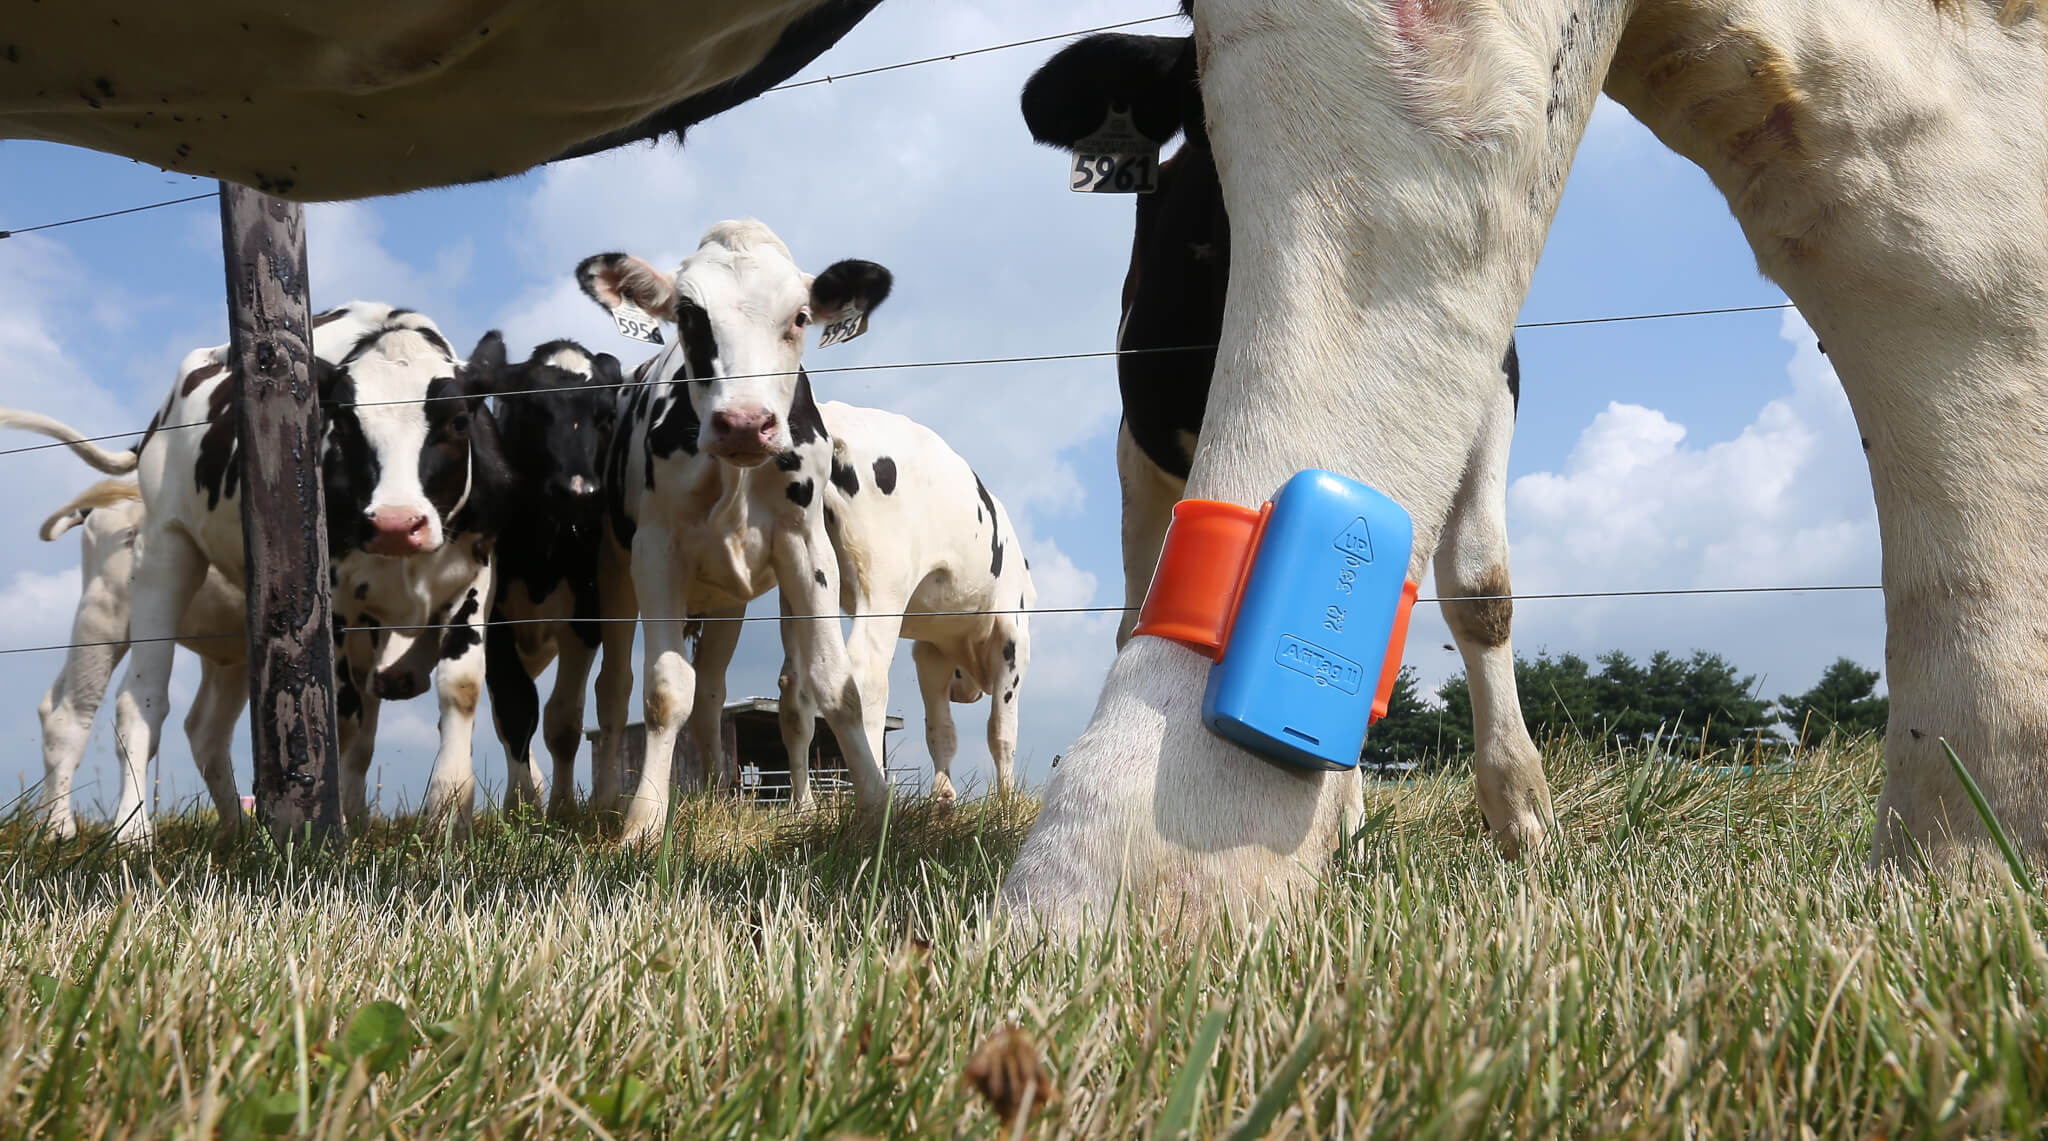

Open a new script for this lab and enter the code in blue below.  This will install the two packages we need onto your computer and then ready them for use.  Change the working directory to your own.  Ensure that you have downloaded the Beef data.xlsx file into your working directory.

In [2]:
# Download packages



In [ ]:
# Ready the package



In [ ]:
# Set to your working directory
# setwd(*where ever the file is saved at*)



We will next examine the Beef data file and read the first sheet (tab named DI) into R. 

In [ ]:
#  Check xls sheet names and how many



In [2]:
# Import first sheet from file.



In [4]:
# Examine first rows.



The first several entries are blank. What is causing the missing information? If you open the file in Excel you will see that the first row is blank and the second row is partially blank. We will skip these rows in the import procedure.

In [5]:
# Remove the first 2 rows from calf.id.raw and save as calf.id


This is better, but now many of the columns of factors are in the format of character strings. Before converting these to factors we will examine the end of the data to ensure there are not more non-data entries lurking there

In [6]:
# Examine the end of the data for any non-data entries



In [7]:
# Change to a factor (class variable)



In [ ]:
# Check that it worked, then repeat for all factors.



In [ ]:
# Avoid typing "calf.id" over and over.



In [ ]:
# Source <- factor(Source)
# Repeat for TRT, Barn, Pen, ASA.num, Plant, Plant.ID



In [ ]:
# Detach calf.id



In [ ]:
# Print calf.id as a string




# Note that it worked for most but not all.

To invoke a column/variable in a particular object, e.g., a data.frame, we use the form: data.frame\\$variable. When we are going to be using a single object for many operations, especially if the object has long name, typing this out many times can be wasteful. The attach() and detach() commands tell R that when you invoke an object, to look at the attached object first. So, if you invoke Barn, R will first see if calf.id$Barn is present.

Now that you know how to read data from an Excel file into R, we will read in several more sheets from the Beef data file. Our task will be to link the data from several sheets through the use of common variables, called keys, that are used in multiple sheets. Your task will be to determine whether a genomic measure, yearling weight expected progeny difference, is a good predictor of feedlot performance or weight gain. 

The first step in preparing the data to address this question is to link the calf.id data from the first sheet to the Yrl.Wt.Epd variable from the genomics sheet. The key to doing this is that there is a common key on both sheets, Calf.ID. We begin by reading in the genomics sheet. 

In [ ]:
# store genomics as the 'Genomic EPD' sheet

In [ ]:
# print genomics as a string

We will now use some base commands and the coordinate designation [ ] to link data on the two sheets. Recall that every entry in a vector has a single coordinate [x] while every entry in a data.frame has two [row, column]. We do not want to simply copy the entire Yrl.Wt.Epd column as it is and bind it to the end of the calf.id data. We do not know if there are rows missing from one or the other data set, if the individual calves are in the same order, and if there are even the same number of entries. It would be tedious to check all of these conditions and quite impractical for large data sets. Therefore, we will employ one of the most powerful basic commands, which().

The which() command accepts as an argument a condition to be met. For example, which(calf.id$ASA.num=="3383368") returns the coordinate 7. This tells us that the seventh entry in the ASA.num column equals that value (a character string here, see above). What makes the which() command powerful is that this result can be passed as a coordinate of a second object to have that entry returned. We are using the first condition to index a value in another object. 

{note: ASA.num is unique to each animal and is an alternative to calf.id; sort of like a single person has a social security number, a unique Purdue id, and a unique drivers license number. In our case, the ASA.num is included in both data sets.}

In [ ]:
# Isolate the coresponding ASA.num values to calf.id



In [ ]:
# Find which calf.id has a ASA.num = "3383368"

In [ ]:
# Within genomics, find the Carc.Wt.EPD from the calf.id that
# has a ASA.num = "3383368"

In [ ]:
# Make a directory called pred.wt that makes a prediction of
# weight gain based on the genomics of yearlings

In [1]:
# See how pred.wt is stored as a separate vector

In [ ]:
# Combine calf.id with pred.wt using cbind and save as calf

In [3]:
# Print calf as a string

It is possible to leave the pred.wt object as a separate vector and continue with the analysis. We are confident that the values for the calf.id individuals are matched between this and the calf.id data.frame.  However, if we alter either of these objects, having them separate risks losing this matching. It is therefore safer to column bind them together into a tidy data format.

The next step is to repeat this procedure to link the data on feedlot performance.

- Do this for the following variables on the the 'Feedlot individual data' variables: Feedlot.entry, Slaughter.wt, and sltr.date.
- To facilitate following along with the rest of the exercise, assign these to objects named: feedlot\\$wt.start, feedlot\\$wt.end, and feedlot\\$date.end.
- Do not attach these vectors to the calf data.frame.

The feedlot performance is caculated as: 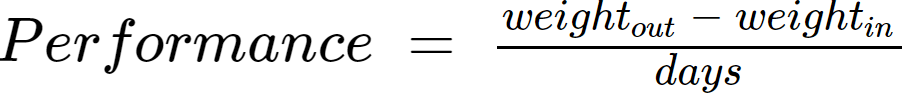 , and thus has units of lb day-1. To calculate the number of days that each cow spend in the feedlot, we will use commands from the lubridate package to manipulate date objects. Dates are stored as a number of seconds from an arbitrarily-set instant in the past. The lubridate package has commands for returning the number of days, months, seconds, et cetera, from these values. The feedlot sheet in the Excel file shows that all cows in this data set entered the feedlot on December 17, 2017. The number of days is thus the difference between this date and the date.end. 

In [ ]:
## Your code here

Calculate this number of days by:

- Use the date() command on the date.end to return a value for this date.
- Use the ymd() command to coerce the character string of "2017-12-17" to a date value for this date.
- Take the difference of these values. Note that it now has the form of a datediff rather than a numeric value.
- Coerce the datediff values into numerical values.

In [ ]:
## Your code here

You now have the denominator for the performance calculation. 
- Finish the calculation of the performance of each cow. You should have values around 2 -- 4 lb/day. 
- Column bind the performance values to the calf object. Call it calf.2. It is good form to change names as things are modified.
- Plot the predictor and response data to see if there might be a relationship. Change the arguments in the plot() command to get your plot to match the one below. Remember to use ?plot for help.

In [ ]:
## Your code here